In [4]:
import pandas
import configparser
import psycopg2

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [6]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [7]:
sql = "select * from student"

In [8]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [9]:
sql = """
    select professor.p_name, course.c_name
    from professor
    inner join course
    on professor.p_email = course.p_email
"""

In [10]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p1,postgresql
1,p2,mongodb
2,p1,twitter
3,p3,facebook


In [11]:
sql = """
    select count(*) as num_stu, c_number
    from enroll
    group by c_number
"""

<AxesSubplot:xlabel='c_number'>

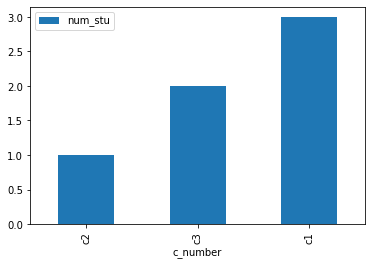

In [12]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='c_number',y='num_stu')

In [13]:
sql = """
    select professor.p_name, count(*) as num_course
    from professor
    inner join course
    on professor.p_email = course.p_email
    group by professor.p_name
"""

<AxesSubplot:xlabel='p_name'>

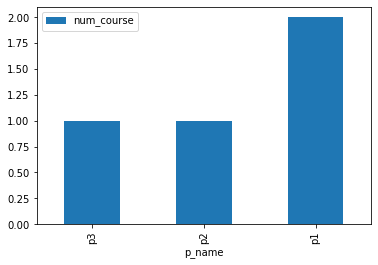

In [14]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name',y='num_course')

In [15]:
sql = """
    insert into student(s_email,s_name,major)
    values('{}','{}','{}')
""".format('s5@jmu.edu','s5','GS')
print(sql)


    insert into student(s_email,s_name,major)
    values('s5@jmu.edu','s5','GS')



In [16]:
cur=conn.cursor()

In [17]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "student_pkey"
DETAIL:  Key (s_email)=(s5@jmu.edu) already exists.


In [18]:
conn.commit()

In [19]:
df = pandas.read_sql_query('select * from student', conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [31]:
sql = """
    insert into professor(p_email, p_name, office)
    values('{}','{}','{}')
""".format('p4@jmu.edu','p4','o4')
print(sql)


    insert into professor(p_email, p_name, office)
    values('p4@jmu.edu','p4','o4')



In [28]:
cur=conn.cursor()

In [32]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [23]:
conn.commit()

In [26]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p2@jmu.edu,p2,o2
2,p4@jmu.edu,p4,o4
3,p3@jmu.edu,p3,o3


In [33]:
conn.rollback()

In [34]:
sql = """
    insert into course (c_number, c_name, room, p_email)
    values ('{}','{}','{}','{}')
""".format('c5','linkedin','r2','p4@jmu.edu')
print(sql)


    insert into course (c_number, c_name, room, p_email)
    values ('c5','linkedin','r2','p4@jmu.edu')



In [35]:
cur=conn.cursor()

In [36]:
cur.execute(sql)

In [37]:
conn.commit()

In [38]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c3,twitter,r1,p1@jmu.edu
3,009,facebook,3,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


In [39]:
sql = """
    update course
    set p_email = '{}'
    where p_email = '{}'
""".format('p4@jmu.edu', 'p2@jmu.edu')
print(sql)


    update course
    set p_email = 'p4@jmu.edu'
    where p_email = 'p2@jmu.edu'



In [40]:
cur=conn.cursor()

In [41]:
cur.execute(sql)

In [42]:
conn.commit()

In [43]:
df = pandas.read_sql_query('select * from course', conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c3,twitter,r1,p1@jmu.edu
2,009,facebook,3,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [44]:
sql = """
    delete from professor
    where p_email = '{}'
""".format('p2@jmu.edu')
print(sql)


    delete from professor
    where p_email = 'p2@jmu.edu'



In [45]:
cur=conn.cursor()

In [46]:
cur.execute(sql)

In [47]:
conn.commit()

In [48]:
df = pandas.read_sql_query('select * from professor', conn)
df[:]

,p_email,p_name,office
0,p1@jmu.edu,p1,o1
1,p4@jmu.edu,p4,o4
2,p3@jmu.edu,p3,o3


In [49]:
cur.close()
conn.close()